# Análisis Exploratorio de Datos

18 de Agosto de 2025

Trabajaremos **en clases** el ejemplo con la base de datos de sobrevivientes de Titanic (https://www.kaggle.com/competitions/titanic). Debe responder todas las preguntas que están en el notebook (con **negrita**).



## Introducción
Antes de cualquier intento de predicciones usando algoritmos de ML, debemos tratar de entender "lo que nos dicen los datos". Para esto, realizamos un análisis de datos exploratorio (EDA en inglés). El EDA es un enfoque para analizar conjuntos de datos que busca resumir sus características principales, a menudo con métodos visuales.
Es el primer paso en cualquier análisis de datos y ayuda a descubrir patrones, detectar anomalías, probar hipótesis y verificar suposiciones. Al explorar los datos, los analistas pueden tomar decisiones informadas sobre qué variables incluir en los modelos y cómo preprocesarlas. Además, permite la selección de métodos de análisis adecuados y la formulación de preguntas de investigación relevantes.


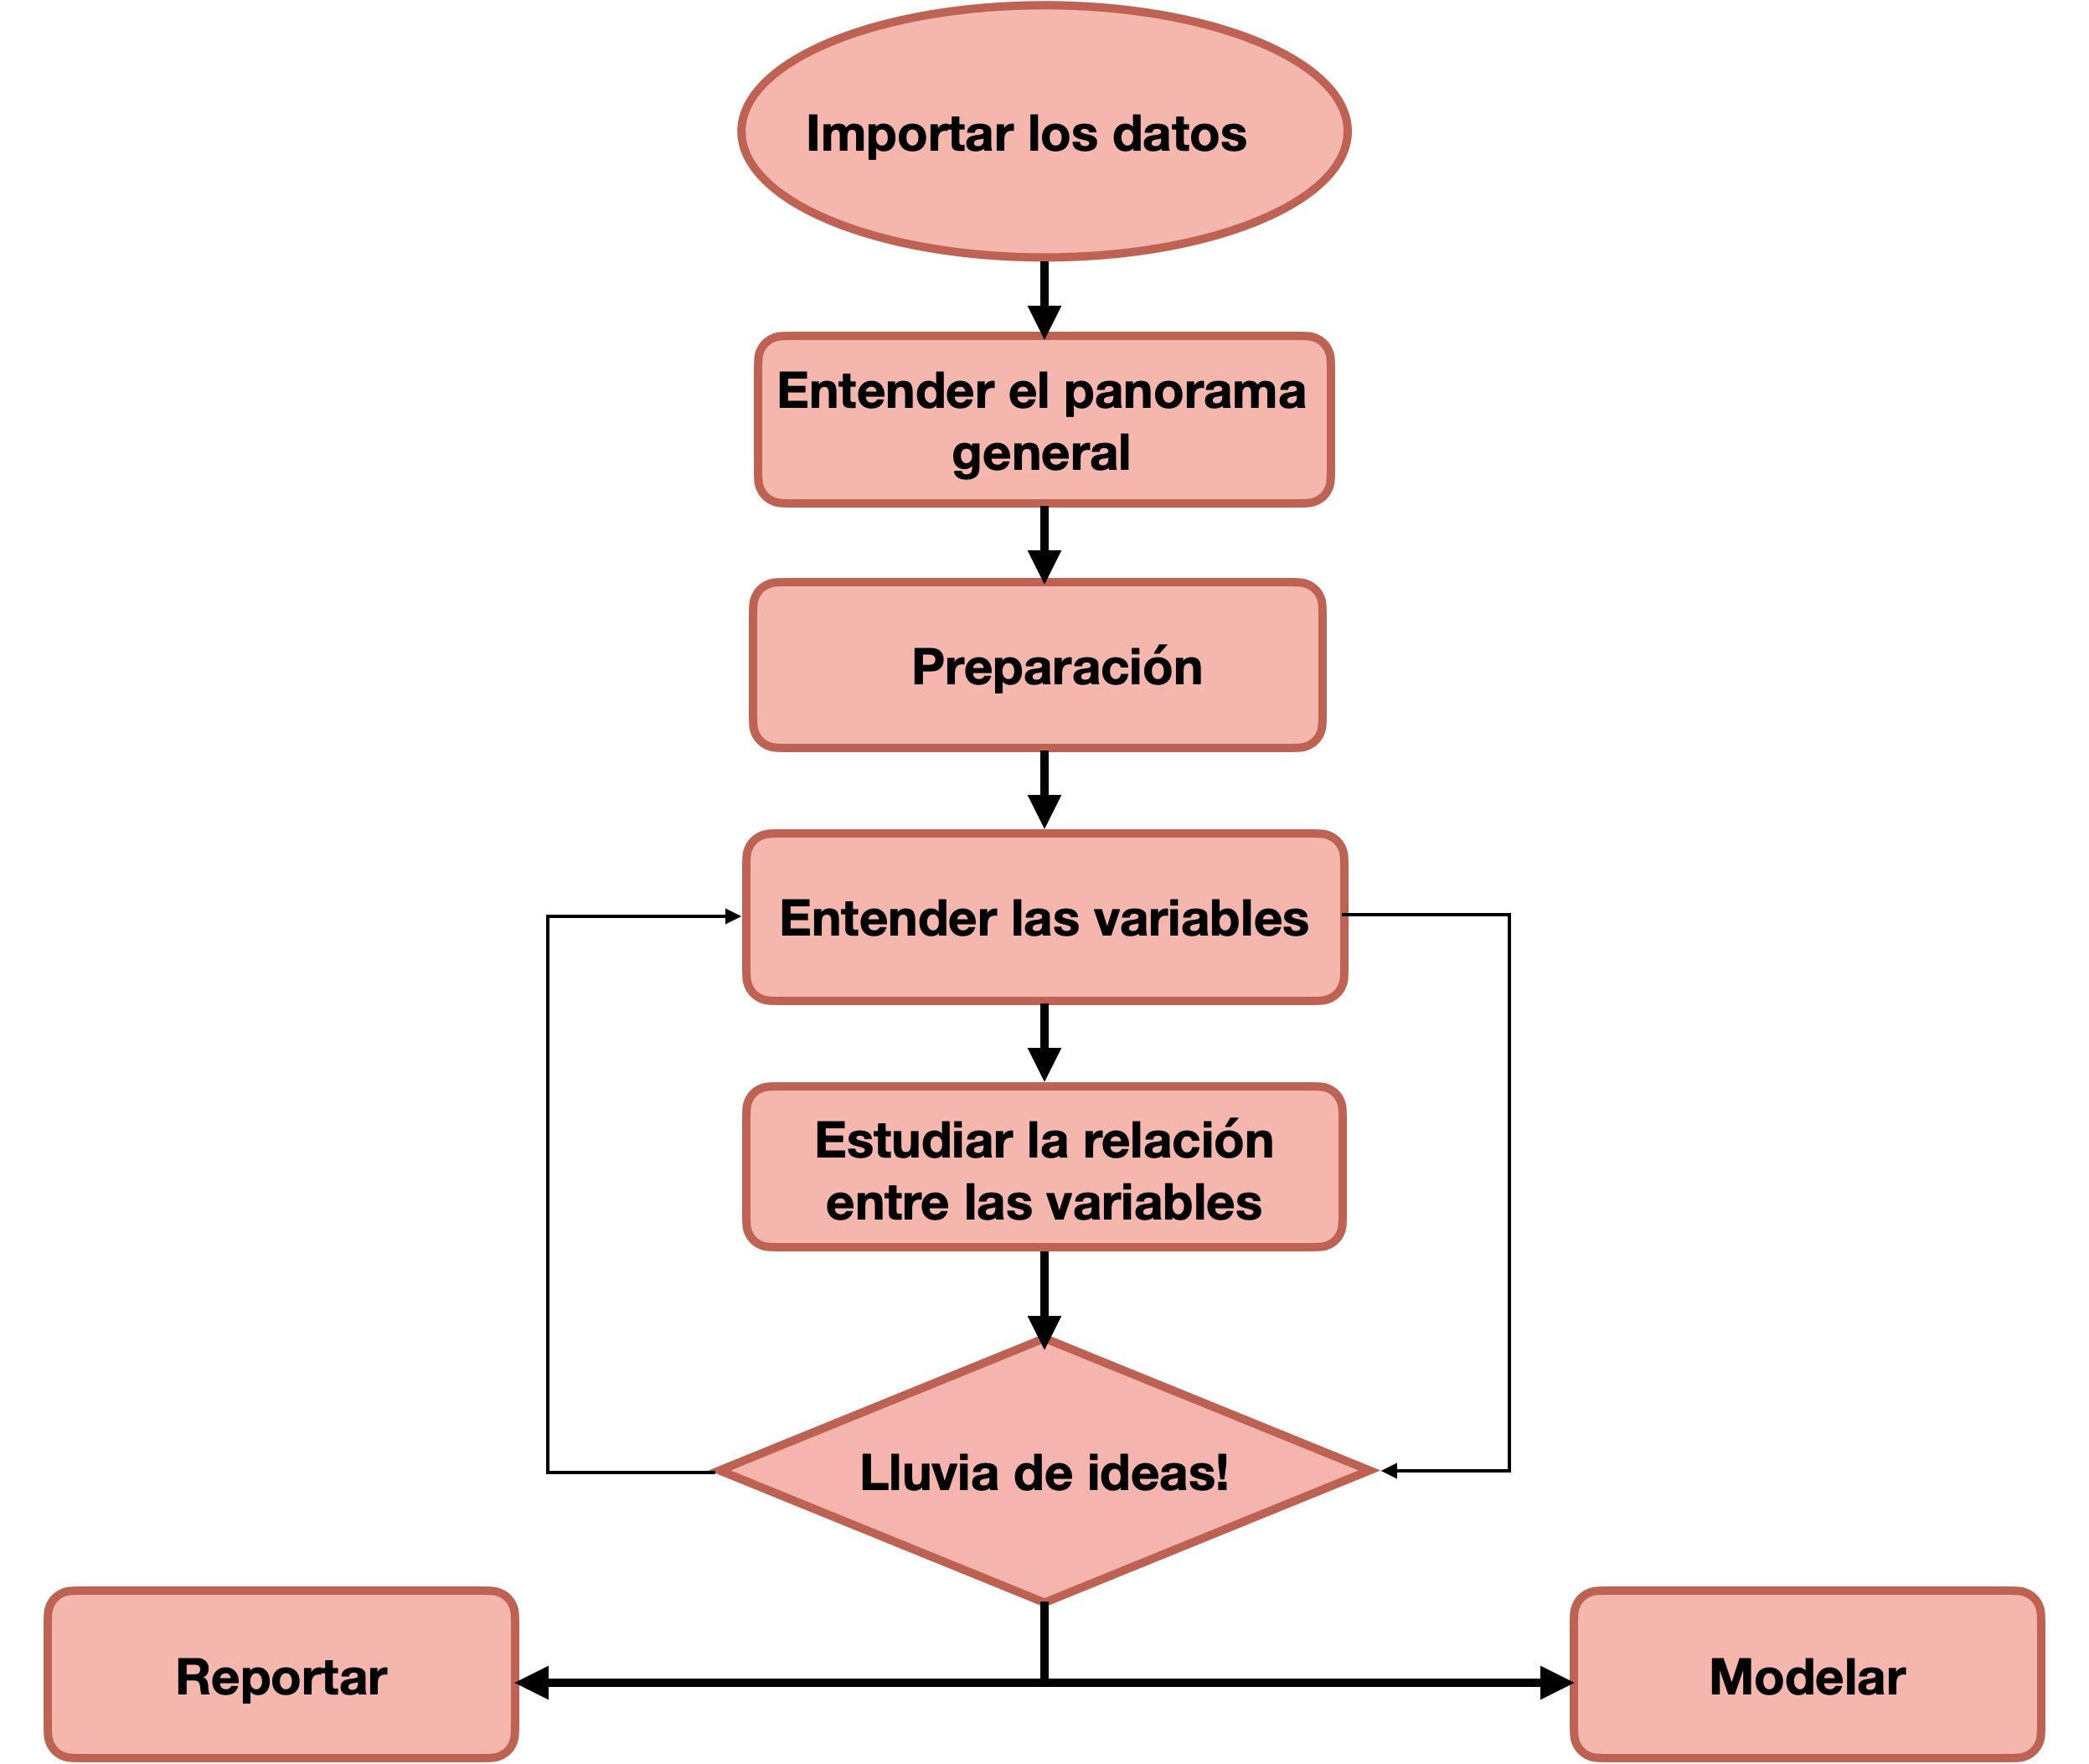

Para empezar nuestra exploración de la base de datos de titanic, importamos las librerías que utilizaremos

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
#importante para mostrar graficos en el notebook

# en esta línea seteamos un parámetro de seaborn que nos mostrará todos los gráficos 
#con una grilla sobre fondo blanco
sns.set_style('whitegrid') 


## Librerías de visualización
### Matplotlib

Matplotlib tiene dos métodos para crear una figura, uno directo y otro enfocado a objetos. 
Algunos links de interés:

- Argumentos que reciben matplotlib: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
- Más opciones de gráficos en https://matplotlib.org/2.0.2/gallery.html
- Para una lista de colores disponibles en Matplotlib, https://matplotlib.org/stable/gallery/color/named_colors.html
- Explicación de plt y ax https://towardsdatascience.com/what-are-the-plt-and-ax-in-matplotlib-exactly-d2cf4bf164a9


### Seaborn
Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos e informativos. A diferencia de Matplotlib, ésta no viene por defecto en Pandas. 
Galería de gráficos: https://seaborn.pydata.org/examples/index.html

Otro link útil para visualizaciones en Python: https://python-graph-gallery.com/

Leemos el archivo que contiene la base de datos

In [ ]:
titanic=pd.read_csv('titanic.csv') 

In [ ]:
titanic.head(4)

Descripción de las características:
- **Survived**	Sobrevivencia	0 = No, 1 = Sí
- **Pclass**	Clase	1 = primera, 2 = segunda, 3 = tercera
- **Sex**	Género
- **Age**	Edad en años (puede ser fraccional si es menos de 1)	
- **Sibsp**	número de hermanas u hermanos o cónyuges	
- **Parch**	número de padres/niños
- **Ticket**		
- **Fare**	Tarifa	
- **Cabin**	Número de la Cabina	
- **Embarked**	Puerto de Embarque	C = Cherbourg, Q = Queenstown, S = Southampton


In [ ]:
type(titanic)

In [ ]:
titanic.describe()

In [ ]:
titanic.info()

**Revise las columnas, la cantidad de filas, cuáles columnas tiene datos faltantes, y cuántos datos faltan por cada columna** 

In [ ]:
titanic['Cabin'].notna().sum()

### El primer paso es caracterizar la muestra, es decir, responder la pregunta: **¿quiénes eran los pasajeros del titanic?**

La función catplot de seaborn (https://seaborn.pydata.org/generated/seaborn.catplot.html) sirve para graficar variables categóricas (con etiquetas). 

Para contabilizar la variable categórica 'Sex'

In [ ]:
titanic['Sex'].value_counts()

In [ ]:
#Los parámetros importantes son los datos de origen, la columna categórica y el tipo de gráfico
sns.catplot(data=titanic, x='Sex',kind='count')# queremos contar las entradas en cada categoría
plt.show()

**Qué podemos concluir de este gráfico?**

**Repita el paso anterior para la variable P_class. Qué puede concluir?**

**Ahora encuentre la distribución de 'Sex' de acuerdo a 'Pclass'**

la opción hue de catplot asigna a una de las variables un color para diferenciarlas por cada categoría

In [ ]:
sns.catplot(...)

**Qué puede concluir de esa figura?**

Debido a que los datos sólo tienen como opciones en la variable 'Sex' las categorías 'female' y 'male' (hombre y mujer), y en la columna 'Age' sólo se indica la edad numéricamente, es conveniente crear una variable categórica que indique si un pasajero es 'female', 'male' o 'child' (niño). 

Creamos una función que agregue una columna 'Persona' con tal categoría



In [ ]:
def titanic_children(age, sex):
    if age <16:
        return 'child'
    else:
        return sex
    
titanic['person'] = titanic.apply(lambda x: titanic_children(x['Age'], x['Sex']), axis=1)
    

**Use catplot para ver la distribución de la nueva variable Person según clase. ¿Qué puede concluir al respecto?**

Ahora analizaremos la variable numérica 'Age' (edad), que es una variable continua. En este caso, la visualización que nos conviene es un histograma

In [ ]:
titanic['Age']

In [ ]:
titanic['Age'].max()

**Haga un histograma con la distribución de edad, usando 15 bins, 50 bins y 3 bins. Comente cuál es el binning más apropiado**

La función FacetGrid de seaborn permite hacer una grilla de múltiples gráficos de variables categóricas
(https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

Creamos un gráfico que muestre la distribución de edad según Sex

In [ ]:
#primero se genera la grilla  vacía
#el parametro hue='Sex' indica que habrá solo un grafico y el color dependerá de la variable 'Sex'
as_fig = sns.FacetGrid(titanic,hue='Sex',aspect=5)

#ahora dibujamos el gráfico que queremos usando as_fig.map()
as_fig.map(sns.kdeplot,'Age',shade=True)

#el limite de edad en el gráfico será la edad mayor, es decir, el maximo de la columna 'Age'
oldest = titanic['Age'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()


**Genere la misma figura, pero separando por la variable Person**

**Haga lo mismo, pero separando por clase**

**¿Qué puede concluir respecto de las edades? Compare calculando el promedio de la columna 'Age'**

**La variable edad tiene datos faltantes. ¿Es una buena suposición reemplazar esos datos con el promedio?  Justifique su respuesta**

**La variable 'Cabin' tiene muchos valores faltantes. ¿Cómo podríamos reemplazar esos datos? Cree usted que la variable 'Cabin' es importante para luego hacer predicciones de supervivencia?**

**La variable 'Embarked' (puerto de embarque) también tiene datos faltantes, como podemos rellenar esos datos?**

Grafique la variable 'Embarked' con catplot

In [ ]:
sns.catplot(...)


**Grafique lo mismo, pero separando por clase**

In [ ]:
sns.catplot(...)


**¿Qué conclusión puede sacar respecto a los gráficos anteriores?**

Las variables 'Parch' y 'SibSp' indican si el pasajero viaja con padres/hijos o hermanos/esposos . 

**Para diferenciarlas, cree la nueva columna 'Alone', que sume ambas cantidades**

In [ ]:
titanic['Alone'] = ...

Podemos representar el valor de la variable 'Alone' en categorías: si el pasajero viaja solo, Alone==0, si tiene familia, Alone > 0. 

**Asigne esas categorías a la variable Alone, de acuerdo a esa condición**

**Grafique la nueva variable  categórica 'Alone' usando catplot**

In [ ]:
sns.catplot(...)

**y lo mismo por clase**

In [ ]:
sns.catplot(...)


**¿Qué conclusiones puede decir respecto a la familia de los viajantes?**

Ahora podemos indagar en los factores que influyen en la supervivencia de los pasajeros. Para esto, buscaremos correlaciones con las variables que hemos discutido. Siempre es bueno recordar que **CORRELACIÓN NO SIGNIFICA CAUSALIDAD**

**Grafique la cantidad de gente que sobrevivió (Survived=1) o murió (Survived=0) usando catplot**

In [ ]:
sns.catplot(...)


**Haga lo mismo pero por clase**

In [ ]:
sns.catplot(...)


Podemos agregar otra categoría al gráfico catplot, incluyendo Pclass, survived y person. Hacemos el gráfico catplot, indicando variables x, y y hue. En este caso, el gráfico no puede ser de barras, sino de puntos

In [ ]:
sns.catplot(x='Pclass',y='Survived',data=titanic,hue='person', kind='point')


**¿Qué conclusión puede sacar de este gráfico?**

**Haga lo mismo con la variable 'Alone'**

In [ ]:
sns.catplot(...)


**¿Qué puede concluir de la figura?**

Otra visualización útil de seaborn es la función lmplot (https://seaborn.pydata.org/generated/seaborn.lmplot.html), que muestra una regresión lineal entre las variables input.  El error mostrado corresponde a un intervalo de confianza de 95%.

Por ejemplo, la relación entre edad, tarifa, clase y puerto de embarque

In [ ]:
sns.lmplot(x = "Age", y = "Fare", hue = "Pclass", col  = "Embarked", data = df)
plt.show()

**Use lmplot para graficar la relacion entre Edad y sobrevivencia, separado por clase**

In [ ]:
sns.lmplot(...)


Lo mismo de arriba pero por clase

**¿Qué puede concluir?**

**Repita lo mismo para edad y sexo, edad y puerto de embarque, y edad y si viaja solo, y anote sus conclusiones**

**Finalmente, resuma sus conclusiones finales que caracterizan a los pasajeros del Titanic y las posibles razones (hipótesis) de la sobrevivencia de algunos**